In [562]:
# Standard imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
                                                                                                                                                                                                                             

In [563]:
# Function for array visual inspection
def array_info(array):
    print('Array: \n{}'.format(array))
    print('Shape: \t{}'.format(array.shape))
    print('Dtype: \t{}\n'.format(array.dtype))

In [564]:
# Generate linearly separable synthetic data whcih will be used as training data
sample_size = 1000
neg_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=sample_size
)

pos_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=sample_size
)

In [565]:
# combine samples into a single array
inputs = np.vstack((neg_samples, pos_samples)).astype(np.float32)
array_info(inputs)

Array: 
[[ 0.1796003   2.7700813 ]
 [-0.20616995  4.9396343 ]
 [-0.09830886  2.9263763 ]
 ...
 [ 2.894369    0.44987103]
 [ 2.549746   -0.70164675]
 [ 1.2681845  -0.8156762 ]]
Shape: 	(2000, 2)
Dtype: 	float32



In [566]:
# Generate corresponding targets
targets = np.vstack((
    np.zeros((sample_size, 1), dtype='float32'),
    np.ones((sample_size, 1), dtype='float32')
))
array_info(targets)

Array: 
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
Shape: 	(2000, 1)
Dtype: 	float32



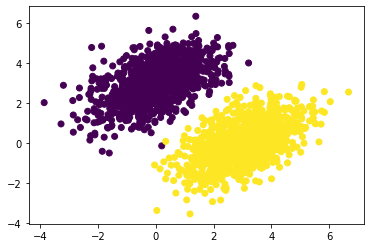

In [567]:
# visualising labeled-training data 
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [568]:
# Creating the linear classifier variables
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim)))
print('W: \n{}'.format(W))
print('b: \n{}'.format(b))


W: 
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.7369733 ],
       [0.40010953]], dtype=float32)>
b: 
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [569]:
# The forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b #  Prediction value for a given point [x, y] which is equal to 0.5. This is a linear equation where Ws are the coefficients of x and y, and b is the bias.

untrained_model_prediction = model(inputs)
y_init = -W[0] / W[1] * x + (0.5 - b) / W[1]

In [570]:
# The mean squared error loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_losses) #  average the per_sample_losses into a single scalar loss-value

In [571]:
# The training step function
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
        
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[W, b]) #  retrieve the gradient of the loss with respect to weights
    W.assign_sub(grad_loss_wrt_W * learning_rate) #  update weight
    b.assign_sub(grad_loss_wrt_b * learning_rate) #  update weight
    return loss

In [572]:
# The batch training loop
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss:0.4f}')

Loss at step 0: 2.4771
Loss at step 1: 0.4373
Loss at step 2: 0.1714
Loss at step 3: 0.1292
Loss at step 4: 0.1160
Loss at step 5: 0.1071
Loss at step 6: 0.0995
Loss at step 7: 0.0926
Loss at step 8: 0.0864
Loss at step 9: 0.0807
Loss at step 10: 0.0755
Loss at step 11: 0.0709
Loss at step 12: 0.0666
Loss at step 13: 0.0628
Loss at step 14: 0.0593
Loss at step 15: 0.0561
Loss at step 16: 0.0533
Loss at step 17: 0.0507
Loss at step 18: 0.0483
Loss at step 19: 0.0461
Loss at step 20: 0.0442
Loss at step 21: 0.0424
Loss at step 22: 0.0408
Loss at step 23: 0.0394
Loss at step 24: 0.0380
Loss at step 25: 0.0368
Loss at step 26: 0.0358
Loss at step 27: 0.0348
Loss at step 28: 0.0339
Loss at step 29: 0.0331
Loss at step 30: 0.0323
Loss at step 31: 0.0316
Loss at step 32: 0.0310
Loss at step 33: 0.0305
Loss at step 34: 0.0300
Loss at step 35: 0.0295
Loss at step 36: 0.0291
Loss at step 37: 0.0287
Loss at step 38: 0.0284
Loss at step 39: 0.0281


(-4.0, 7.0)

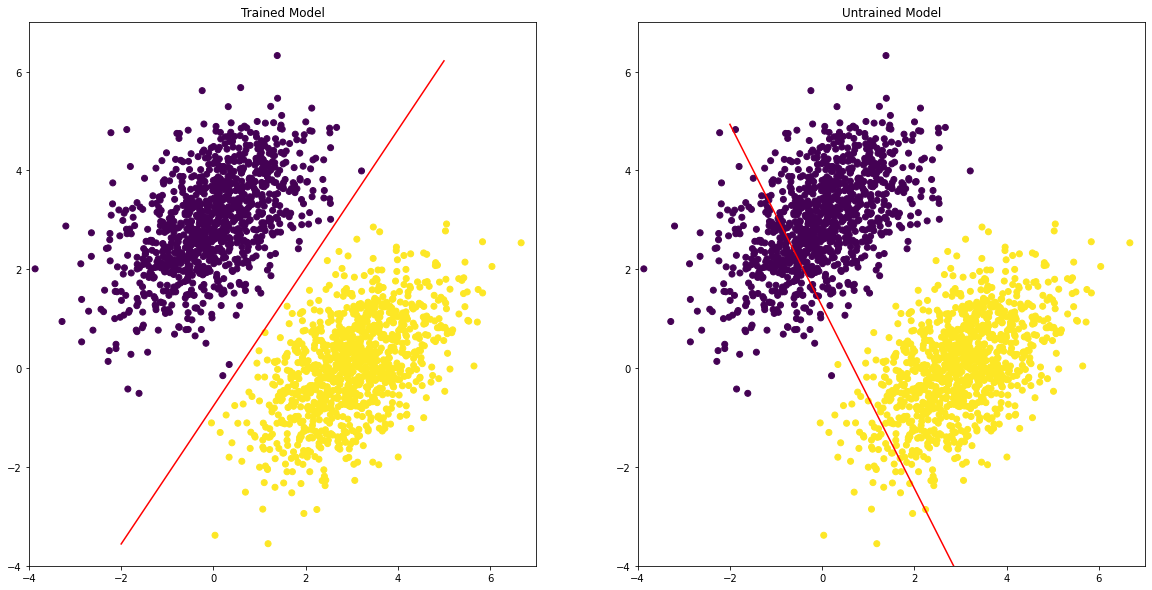

In [585]:
# Comparing the Trained and Untrained model predictions
trained_model_prediction = model(inputs)
x = np.linspace(-2, 5, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]

plt.figure(figsize=[20, 10])
plt.subplot(121);plt.plot(x, y, '-r');plt.scatter(inputs[:, 0], inputs[:, 1], c=trained_model_prediction[:, 0] > 0.5);plt.title("Trained Model");plt.ylim(-4, 7);plt.xlim(-4, 7)
plt.subplot(122);plt.plot(x, y_init, '-r');plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0]);plt.title("Untrained Model");plt.ylim(-4, 7);plt.xlim(-4, 7)